## Import Modules

- `pandas as pd`: Data manipulation with DataFrames.  
- `numpy as np`: Numerical operations on arrays.  
- `os`: File and directory handling.  
- `seaborn as sns`: Statistical data visualization.  
- `matplotlib.pyplot as plt`: Plotting graphs and charts.  
- `librosa` & `librosa.display`: Audio processing and visualization (e.g., MFCCs, spectrograms).  
- `IPython.display.Audio`: Play audio within Jupyter notebooks.  
- `warnings.filterwarnings('ignore')`: Suppress non-critical warnings for cleaner output.

**Purpose:**  
Sets up essential tools for loading, processing, visualizing audio data, and managing datasets in speech emotion recognition projects.


In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

- **Purpose:**  
  This code traverses the `./Dataset/TESS` directory to collect audio file paths and extract corresponding emotion labels from filenames.

- **Step-by-step:**

  1. Initialize empty lists:  
     - `paths` to store full file paths  
     - `labels` to store emotion labels

  2. Use `os.walk()` to iterate through all files in `./Dataset/TESS` and its subdirectories.

  3. For each `filename`:  
     - Append the full path (`dirname + filename`) to `paths`.  
     - Extract the label by splitting the filename on underscores `_`, taking the last segment, then removing the file extension.  
     - Convert the label to lowercase and append to `labels`.

  4. Stop loading once 2800 files are collected (the size of the TESS dataset).

  5. Print confirmation message `"Dataset is Loaded"`.

- **Result:**  
  Two lists:  
  - `paths` containing all audio file locations  
  - `labels` containing the corresponding emotion categories extracted from filenames

This prepares the dataset for further processing like feature extraction and model training.

In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('./Dataset/TESS'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


#### Creating and Exploring a DataFrame for Speech Data

- **`len(paths)`**  
  Returns the total number of audio file paths collected, confirming dataset size.

- **`paths[:5]` and `labels[:5]`**  
  Display the first 5 file paths and their corresponding emotion labels to verify data correctness.

- **Creating a DataFrame:**  
```python
      df = pd.DataFrame()
      df['speech'] = paths
      df['label'] = labels
```
Constructs a pandas DataFrame with two columns:  
- `'speech'`: file paths to audio samples  
- `'label'`: corresponding emotion labels

- **`df.head()`**  
Shows the first 5 rows of the DataFrame for a quick preview.

- **`df['label'].value_counts()`**  
Counts and displays the number of samples per emotion label, useful for checking class distribution and dataset balance.

---

**Summary:**  
This block organizes raw file paths and labels into a structured DataFrame and performs initial exploratory checks to ensure data integrity and understand label distribution.


In [3]:
len(paths)

2800

In [4]:
paths[:5]

['./Dataset/TESS\\OAF_angry\\OAF_back_angry.wav',
 './Dataset/TESS\\OAF_angry\\OAF_bar_angry.wav',
 './Dataset/TESS\\OAF_angry\\OAF_base_angry.wav',
 './Dataset/TESS\\OAF_angry\\OAF_bath_angry.wav',
 './Dataset/TESS\\OAF_angry\\OAF_bean_angry.wav']

In [5]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [6]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,./Dataset/TESS\OAF_angry\OAF_back_angry.wav,angry
1,./Dataset/TESS\OAF_angry\OAF_bar_angry.wav,angry
2,./Dataset/TESS\OAF_angry\OAF_base_angry.wav,angry
3,./Dataset/TESS\OAF_angry\OAF_bath_angry.wav,angry
4,./Dataset/TESS\OAF_angry\OAF_bean_angry.wav,angry


In [7]:
df['label'].value_counts()

label
angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: count, dtype: int64

## Exploratory Data Analysis

#### Visualizing Label Distribution with Seaborn Countplot

The command:
```python
    sns.countplot(data=df, x='label')
```
creates a bar chart that displays the number of samples for each emotion label in your dataset.

---

#### What Does This Plot Show?

- **X-axis:** Emotion categories (e.g., happy, sad, angry, neutral, fear, disgust, surprise).
- **Y-axis:** Number of samples for each category.
- **Purpose:** Helps you quickly assess class balance in your dataset, which is crucial for training robust machine learning models.


---

#### Why Use This Plot?

- **Check for Data Imbalance:** Ensures you have a fair representation of each emotion.
- **Data Quality Insight:** Detects missing or overrepresented classes before model training.
- **Easy Interpretation:** Visualizes categorical data distribution at a glance.

---

**Tip:**  
If you notice significant imbalance, consider techniques like resampling or class weighting during model training for better results.


<Axes: xlabel='label', ylabel='count'>

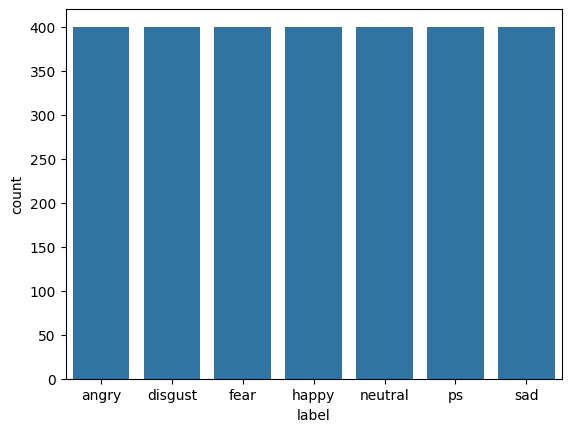

In [8]:
sns.countplot(data=df, x='label')

### Audio Visualization Functions

This code defines two functions for visualizing audio signals—one for plotting the waveform and another for displaying the spectrogram. Both are essential tools in audio and speech emotion recognition projects.

---

#### 1. `waveplot(data, sr, emotion)`

- **Purpose:**  
  Plots the raw audio waveform, which shows how the amplitude of the audio signal varies over time.

- **Parameters:**
  - `data`: The audio time series data (a NumPy array).
  - `sr`: The sampling rate of the audio.
  - `emotion`: A string label for the emotion, used as the plot title.

- **How it works:**
  1. Creates a figure of size 10x4 inches.
  2. Sets the plot title to the emotion label.
  3. Uses `librosa.display.waveshow` to plot the waveform.
  4. Displays the plot.

- **Why use it?**  
  Waveform plots help you visually inspect the amplitude patterns of different emotions in speech, which can reveal differences in loudness, energy, and speaking style.

---

#### 2. `spectogram(data, sr, emotion)`

- **Purpose:**  
  Displays the spectrogram of an audio signal, showing how its frequency content evolves over time.

- **Parameters:**
  - `data`: The audio time series data.
  - `sr`: The sampling rate.
  - `emotion`: The emotion label for the plot title.

- **How it works:**
  1. Computes the Short-Time Fourier Transform (STFT) of the audio to get the frequency representation.
  2. Converts the amplitude to decibels for better visualization.
  3. Creates a figure of size 11x4 inches.
  4. Sets the plot title to the emotion label.
  5. Uses `librosa.display.specshow` to display the spectrogram with time on the x-axis and frequency (in Hz) on the y-axis.
  6. Adds a color bar to indicate amplitude in decibels.

- **Why use it?**  
  Spectrograms are powerful for analyzing the frequency characteristics of speech. Different emotions can have distinct frequency patterns, which are useful for feature extraction and model training.

---

#### Summary Table

| Function      | Visualization Type | Shows...                         | Useful for...                       |
|---------------|-------------------|----------------------------------|-------------------------------------|
| `waveplot`    | Waveform          | Amplitude vs. time               | Inspecting loudness, energy, style  |
| `spectogram`  | Spectrogram       | Frequency content over time      | Analyzing pitch, timbre, emotion    |

---

**In practice:**  
These visualizations help you understand and debug your audio data, compare emotional speech characteristics, and present findings in speech emotion recognition projects.


In [9]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

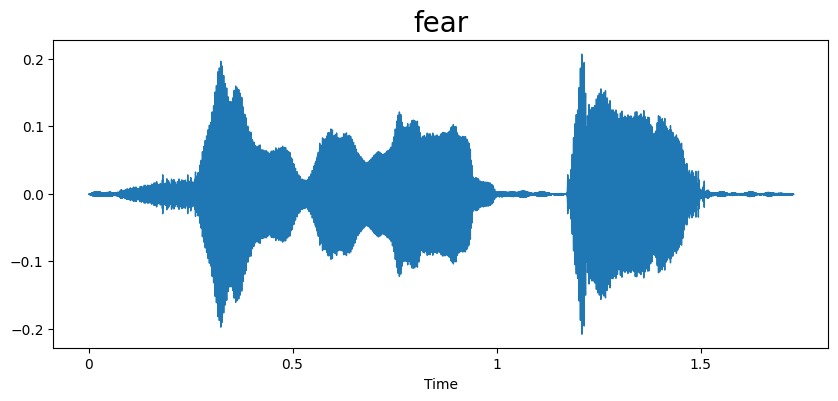

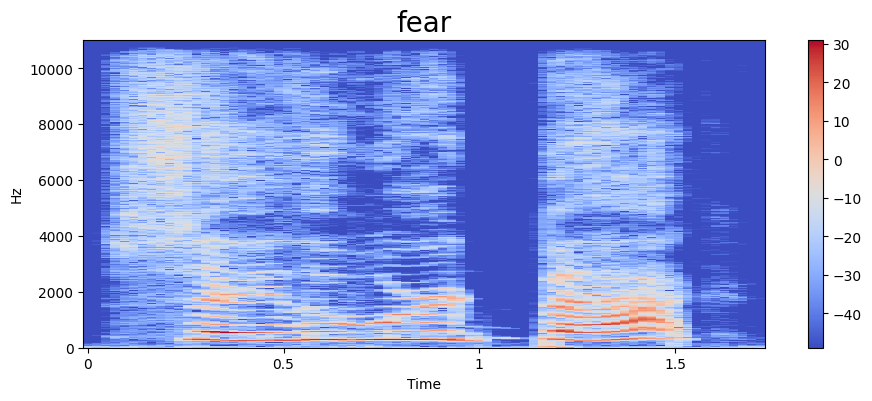

In [10]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

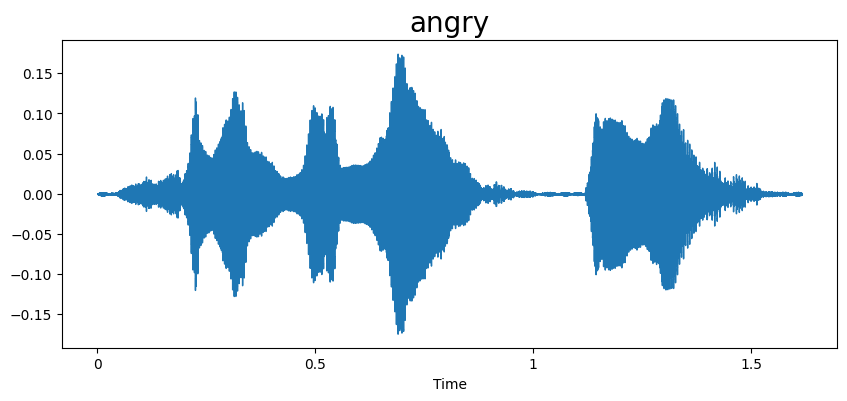

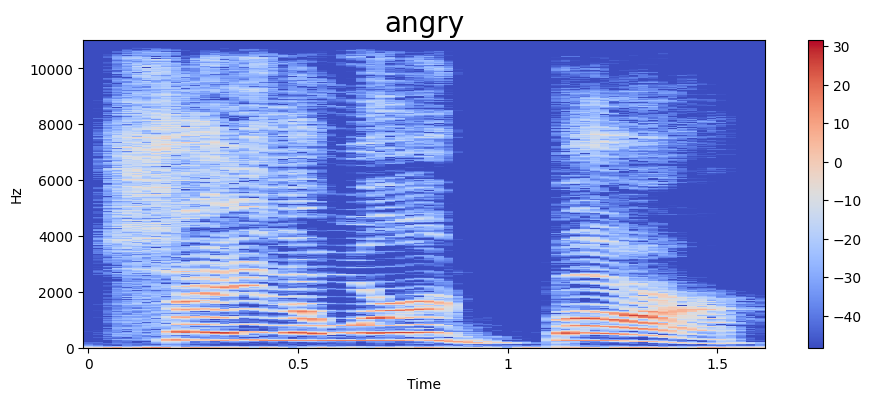

In [11]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

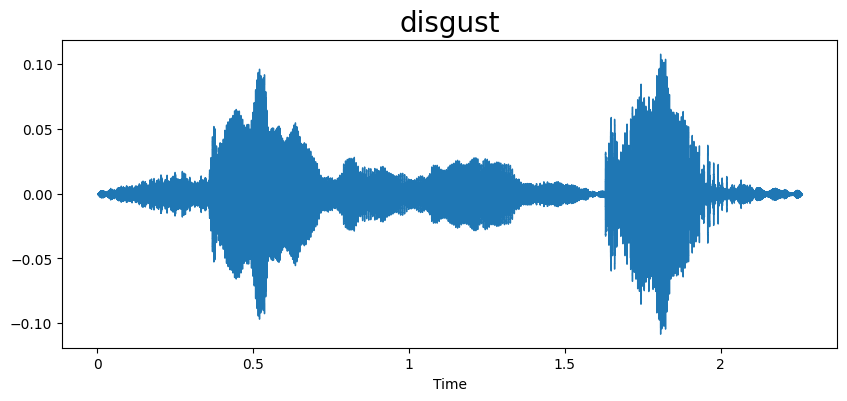

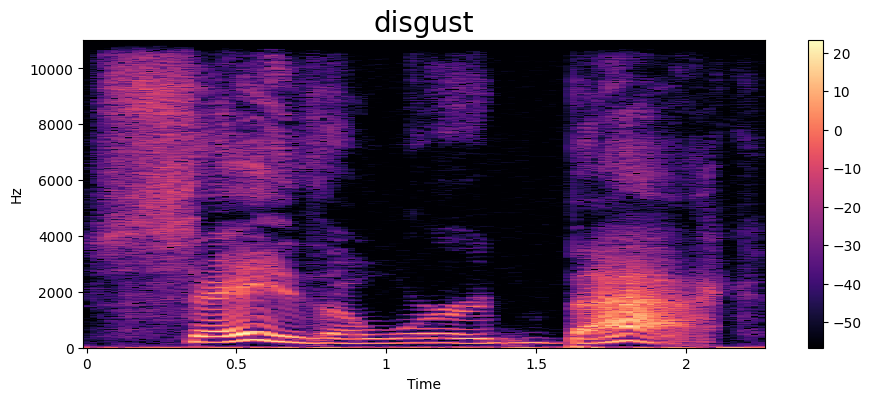

In [12]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

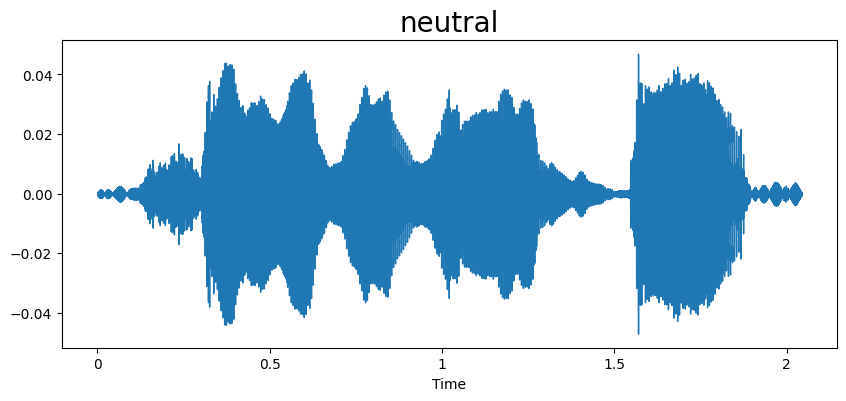

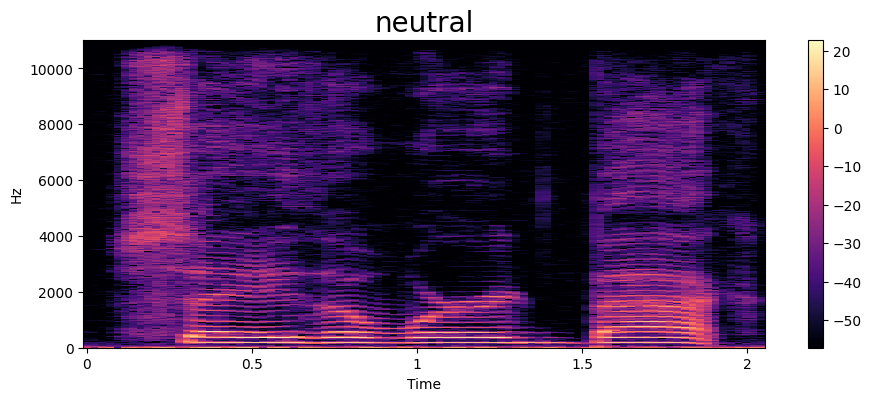

In [13]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

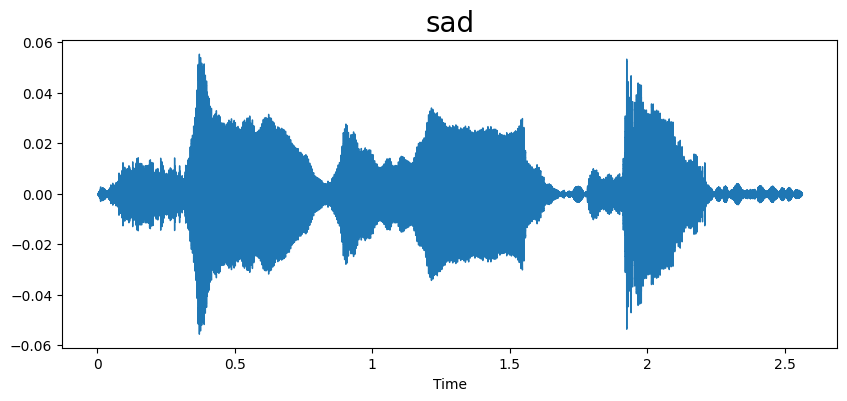

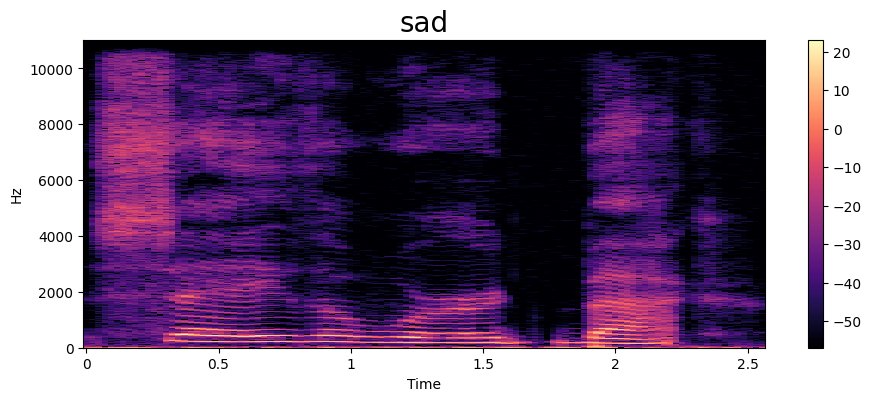

In [14]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

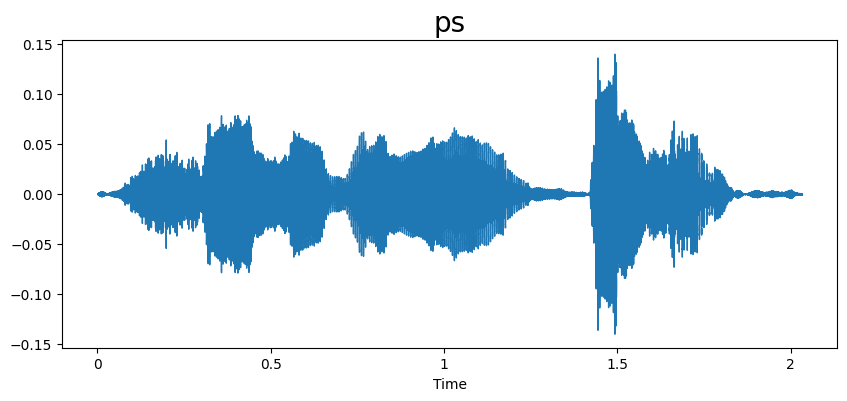

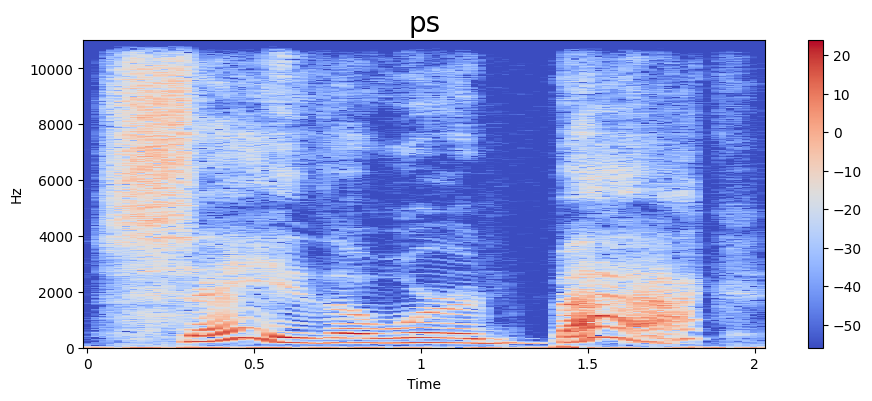

In [15]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

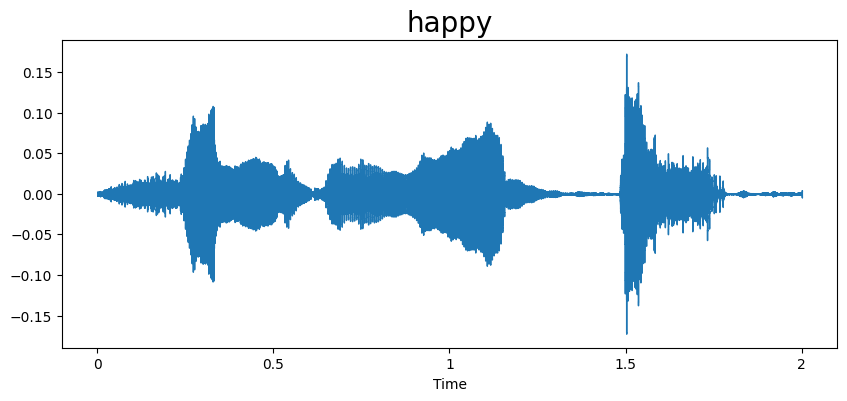

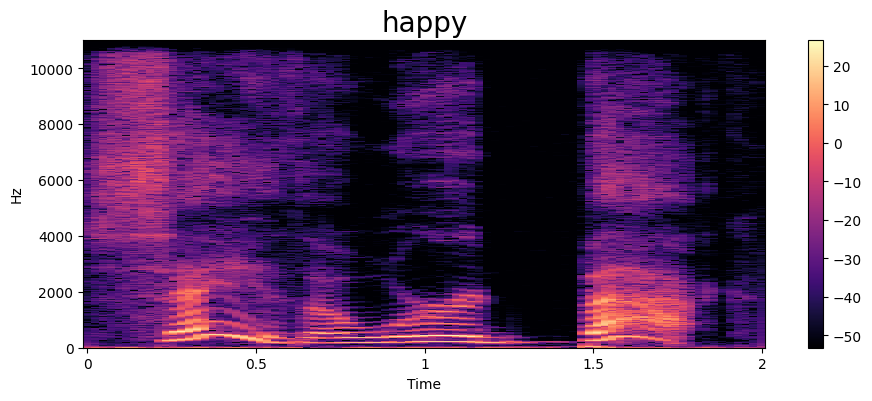

In [16]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

This code extracts Mel-Frequency Cepstral Coefficients (MFCC) features from audio files and prepares the input data for machine learning models in speech emotion recognition.

---

#### 1. `extract_mfcc(filename)` function

- **Purpose:**  
  Load an audio file and extract a fixed-length MFCC feature vector.

- **Process:**  
  - `librosa.load(filename, duration=3, offset=0.5)`:  
    Loads the audio file, reading 3 seconds of audio starting 0.5 seconds into the file. This standardizes input length.  
  - `librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)`:  
    Extracts 40 MFCC coefficients per frame from the audio signal.  
  - `np.mean(..., axis=0)`:  
    Takes the mean across all frames (time axis), resulting in a single 40-dimensional feature vector representing the whole audio clip.  
  - Returns this averaged MFCC vector.

#### 2. Applying MFCC extraction to the dataset
```python
        X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
```
- Applies the `extract_mfcc` function to each audio file path in the DataFrame column `speech`.
- Produces a pandas Series of MFCC feature vectors.

#### 3. Preparing feature array for modeling
```python
        X = [x for x in X_mfcc]
        X = np.array(X)
```
- Converts the Series of MFCC vectors into a NumPy array `X` of shape `(num_samples, 40)`.

#### 4. Expanding dimensions for model input

```python
        X = np.expand_dims(X, -1)
```
- Adds an extra dimension at the end, changing shape to `(num_samples, 40, 1)`.  
- This is often required for LSTM or CNN models expecting 3D input: `(samples, timesteps, features)` or `(samples, features, channels)`.

---

#### Why MFCC?
- MFCCs capture the spectral properties of speech, mimicking human auditory perception.
- Averaging over time reduces variable-length sequences to fixed-size feature vectors, simplifying model input.

---

#### Summary

| Step                      | Description                                  | Resulting Shape        |
|---------------------------|----------------------------------------------|-----------------------|
| Load & extract MFCC       | Extract 40 MFCC coefficients per audio file | `(40,)` per sample    |
| Apply to all samples      | Process entire dataset                        | `(num_samples, 40)`   |
| Expand dimension          | Add channel dimension for model compatibility| `(num_samples, 40, 1)`|

This pipeline converts raw audio files into standardized, model-ready feature arrays for speech emotion classification.

---

*References:*  
- [Speech Emotion Recognition using MFCC](https://github.com/hallowshaw/Speech-Emotion-Recognition-with-MFCC)[1]  
- Various academic papers highlight MFCC as a robust feature for emotion detection in speech[2][3][4].

In [17]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [18]:
extract_mfcc(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666927e+01,
       -2.11275625e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228361e+00, -5.57366073e-01, -1.83255339e+00,  2.02101856e-01,
        7.27551103e-01,  1.31773746e+00,  2.88633752e+00,  2.85579062e+00,
       -4.71292210e+00, -4.43651009e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126190e+00, -1.79688025e+00, -7.03765249e+00,  9.43658352e+00,
        8.35585403e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722015e-01,  5.11131525e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996375e+00, -1.82390761e+00,
        4.86896276e+00,  9.31392288e+00,  2.08914971e+00, -1.90649164e+00],
      dtype=float32)

In [19]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [20]:
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666693, -...
1       [-465.73267, 98.77373, 0.65600866, -32.74544, ...
2       [-429.79196, 46.12401, 1.5550474, -0.21709463,...
3       [-403.46118, 76.32369, -12.531776, -22.288858,...
4       [-434.05756, 77.4455, 10.8654995, 16.092943, 8...
                              ...                        
2795    [-553.22003, 89.83577, 27.215466, 16.407124, 1...
2796    [-589.23676, 96.20407, 36.96118, 15.014446, 28...
2797    [-533.41815, 85.43242, 27.791998, 19.307178, 2...
2798    [-548.6142, 110.16424, 31.910236, 12.572517, 2...
2799    [-549.2962, 102.374565, 32.268833, 26.261616, ...
Name: speech, Length: 2800, dtype: object

In [21]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [22]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

#### One-Hot Encoding Labels

- Uses `OneHotEncoder` from scikit-learn to convert categorical emotion labels into binary vectors.
- `fit_transform` learns label categories and encodes them.
- `toarray()` converts sparse output to a dense NumPy array.
- Resulting shape is `(num_samples, num_classes)`, suitable for classification models.
- One-hot encoding avoids implying order between classes and is essential for multi-class tasks.

This step prepares the target labels for training speech emotion recognition models efficiently[1].


In [23]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [24]:
y = y.toarray()

In [25]:
y.shape

(2800, 7)

## Create the LSTM Model

- **Model Architecture:**
  - `LSTM(256, return_sequences=False, input_shape=(40,1))`:  
    A single LSTM layer with 256 units processing sequences of length 40 with 1 feature per timestep. Outputs the last hidden state.
  - `Dropout(0.2)`:  
    Dropout layer with 20% rate to reduce overfitting.
  - `Dense(128, activation='relu')`:  
    Fully connected layer with 128 neurons and ReLU activation.
  - `Dropout(0.2)`: Another dropout layer.
  - `Dense(64, activation='relu')`:  
    Dense layer with 64 neurons.
  - `Dropout(0.2)`: Another dropout layer.
  - `Dense(7, activation='softmax')`:  
    Output layer with 7 units (for 7 emotion classes) using softmax for multi-class probabilities.

- **Compilation:**
  - Loss: `categorical_crossentropy` (suitable for multi-class classification).
  - Optimizer: `adam` (adaptive gradient optimizer).
  - Metric: `accuracy` to monitor performance.

- **`model.summary()`**:  
  Prints the model architecture, showing layer types, output shapes, and number of parameters.

---

**Summary:**  
This LSTM-based deep learning model is designed to classify speech emotions from MFCC features, balancing complexity and regularization to improve generalization.


In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)


- **Purpose:**  
  Trains the compiled LSTM model on input features `X` and one-hot encoded labels `y`.

- **Parameters:**
  - `X`: Input data, typically MFCC features shaped `(samples, timesteps, features)`.
  - `y`: One-hot encoded target labels.
  - `validation_split=0.2`: Reserves 20% of data for validation to monitor model performance on unseen data during training.
  - `epochs=50`: Number of complete passes through the training dataset.
  - `batch_size=64`: Number of samples processed before the model updates weights.

- **What happens during training:**
  - The model learns to map input sequences to emotion classes by minimizing the categorical cross-entropy loss.
  - Validation metrics help detect overfitting or underfitting.
  - Training progress and metrics are stored in `history` for later analysis or plotting.

---

#### Additional Notes

- A batch size of 64 balances memory use and convergence speed.
- 50 epochs is a common starting point; early stopping can be used to halt training if validation loss stops improving.
- This approach is standard for sequence classification tasks using LSTM networks[1].

---

*References:*  
[1] Machine Learning Mastery - Sequence Classification with LSTM in Keras  
https://www.machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/

In [27]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.4405 - loss: 1.4988 - val_accuracy: 0.7321 - val_loss: 0.7258
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8498 - loss: 0.4123 - val_accuracy: 0.9107 - val_loss: 0.2417
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9414 - loss: 0.2089 - val_accuracy: 0.9589 - val_loss: 0.1334
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9580 - loss: 0.1185 - val_accuracy: 0.9250 - val_loss: 0.2779
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9468 - loss: 0.1936 - val_accuracy: 0.9500 - val_loss: 0.1231
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9787 - loss: 0.0788 - val_accuracy: 0.9554 - val_loss: 0.1342
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9657 - loss: 0.1077 - val_accuracy: 0.9714 - val_loss: 0.0894
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9751 - loss: 0.0937 - val_accuracy: 0.9875 - v

## Plot the results


- **Purpose:**  
  Visualizes how the model’s accuracy changes over the 50 training epochs for both training and validation sets.

- **Details:**  
  - `epochs`: List of epoch numbers from 0 to 49.  
  - `acc`: Training accuracy values recorded after each epoch.  
  - `val_acc`: Validation accuracy values recorded after each epoch.  
  - `plt.plot()`: Plots accuracy curves for training and validation.  
  - Labels and legend make the plot easy to interpret.

- **Why use this plot?**  
  - To monitor model performance and detect overfitting or underfitting.  
  - If training accuracy improves but validation accuracy plateaus or decreases, the model may be overfitting.

- **Reference:**  
  This is a standard approach to visualize model learning progress in Keras and other deep learning frameworks[4][7].

---

**Summary:**  
This plot helps you evaluate how well your model generalizes to unseen data during training by comparing training and validation accuracy trends.


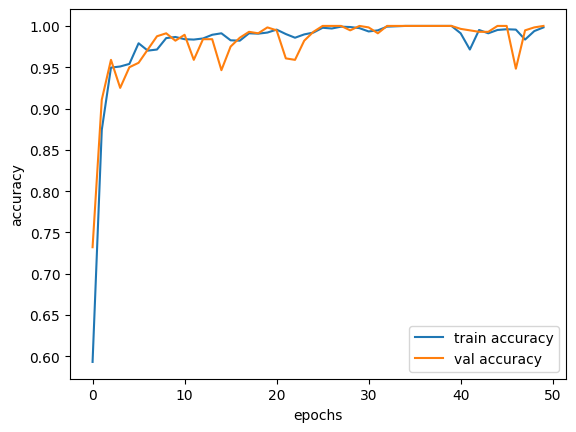

In [29]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#### Plotting Training and Validation Loss


- **Purpose:**  
  Visualizes the model’s loss on training and validation data over all epochs.

- **Details:**  
  - `loss`: Training loss values per epoch.  
  - `val_loss`: Validation loss values per epoch.  
  - Plotting both helps track how well the model fits the training data and generalizes to unseen data.

- **Why important?**  
  - A decreasing training loss shows the model is learning.  
  - Validation loss helps detect overfitting if it starts increasing while training loss decreases.  
  - Helps decide when to stop training or adjust hyperparameters.

- **Reference:**  
  This is a standard practice in Keras to monitor model performance during training and is widely recommended for diagnosing model behavior[1][4][6].

---

**Summary:**  
This plot provides insight into the model’s convergence and generalization, guiding improvements in training strategy.

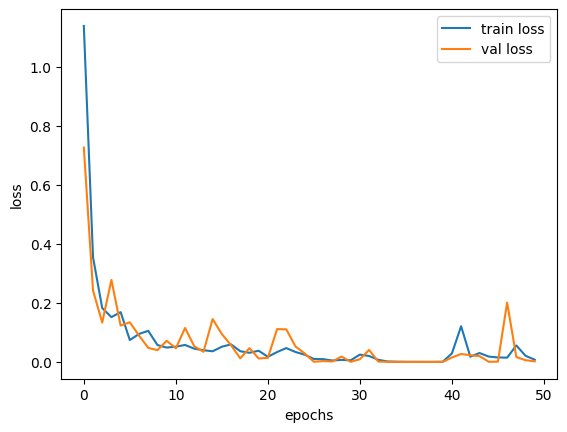

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#### Saving a Keras Model to HDF5 Format
- **Purpose:**  
  Saves the entire trained Keras model to a single file named `SEA_model.h5` using the HDF5 format.

- **What is saved:**  
  - Model architecture (layers and configuration)  
  - Learned weights  
  - Training configuration (loss function, optimizer)  
  - Optimizer state (enables resuming training)

- **Why use `.h5` format:**  
  - Widely supported legacy format for Keras models  
  - Stores everything in one compact file  
  - Easy to share, deploy, or reload later

- **How to load the saved model:**  
```python
    from keras.models import load_model
    model = load_model('SEA_model.h5')
    model.summary()
```

- **References:**  
- [TensorFlow Keras Save and Load Models](https://www.tensorflow.org/tutorials/keras/save_and_load)[1]  
- [Keras Model Saving Guide](https://keras.io/guides/serialization_and_saving/)[3]  
- [Stack Overflow: How to Save Final Model Using Keras](https://stackoverflow.com/questions/42763094/how-to-save-final-model-using-keras)[2]

---

**Summary:**  
Using `model.save('SEA_model.h5')` is a simple and effective way to persist your trained speech emotion recognition model for future use, evaluation, or deployment.


In [31]:
model.save('SEA_model.h5')

# Conclusion

In this project, we built a complete pipeline for speech emotion recognition using deep learning:

- **Data Preparation:**  
  Loaded and labeled audio files, extracted meaningful MFCC features, and organized them into a structured format.

- **Model Design:**  
  Developed an LSTM-based neural network tailored to capture temporal patterns in speech features, with dropout layers to reduce overfitting.

- **Training and Evaluation:**  
  Trained the model with appropriate hyperparameters, monitored accuracy and loss on training and validation sets, ensuring good generalization.

- **Model Saving:**  
  Persisted the trained model for future inference or further training.

This approach demonstrates how combining audio signal processing with sequence modeling can effectively classify emotions from speech, providing a foundation for building intelligent, emotion-aware applications.

---

Feel free to extend this work by experimenting with different features, deeper architectures, or data augmentation to further improve performance!
